# EDA

## 0. Import libraries

### Standard Libraries

In [ ]:
# STANDARD LIBRARIES
# System and file management
import sys
import os
from tqdm import tqdm
# import shutil # functions of high-level operations on files and collections of files
import glob  # functions to organize files under a specified folder

# Drive
from google.colab import drive
from google.colab import files

# Images
import cv2 # opencv-free library for artificial vision
import PIL # python imaging library
from PIL import Image 

# Pandas and Numpy
import pandas as pd
import numpy as np
from numpy import savetxt
import random
# import regex as re

# sklearn
from sklearn.utils import shuffle

# Visualization tools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### Activate Drive

In [ ]:
# Mount google drive in google colab
drive.mount('/content/drive')

Mounted at /content/drive


Custom libraries (Python)

In [ ]:
sys.path.insert(0,'/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/notebooks/modules')

In [ ]:
# Availables python functions 
!ls '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/notebooks/modules'

classification.py    image_viz.py	     __pycache__
eda.py		     old		     test.py
files_management.py  performance_checker.py  unet.py


In [ ]:
# CUSTOM LIBRARIES

# File management
import files_management as fm

# Vizualizations
import image_viz as iv
import eda

## 1.Paths

In [ ]:
# Drive paths
GEN_DRIVE = '/content/drive'
DRIVE = '/My Drive' 
PROJECT = '/IRONHACK/PROJECTS/CNN-Leukemia'
  
# Folder containing the original data.
INPUT = '/input'

# Folder containing the notebooks.
NB = '/notebooks'
# Functions
FUNCTION = GEN_DRIVE+DRIVE+PROJECT+NB+'/modules'  

# Folder containing the outputs (arrays/csv/viz/models).
OUTPUT = '/output/'
SUBFOLDER = ['arrays/','csv','viz','models/']
# Arrays
DEST = ['128x128','450x450','validation']

# Training images
# Images are stored in three different folders (fold_0, fold_1, fold_2)
TRAIN = '/training_data/'
FOLDERS = ['fold_0','fold_1','fold_2']
# Diseasedd Cells (ALL)/ Non-Diseased Cells (HEM)
CELLS = ['all', 'hem']

# Valudation data
VALIDATION = '/validation_data/C-NMC_test_prelim_phase_data'

## 2. Training Data Preprocessing

### Input folder

Loading data (https://www.kaggle.com/andrewmvd/leukemia-classification) stored in Google Drive **input** folder.


![picture](https://drive.google.com/uc?id=1XIhgCHritHcTbR1gCIsUReAXo3S0hkOz)

where:
  - all: Leukemia cells
  - hem: Normal (healty) cells

In [ ]:
# INPUT folder
path_input = GEN_DRIVE+DRIVE+PROJECT+INPUT

### 2.1 Image exploration

Let's load the module: **image_viz** as **iv**

Visualization of **two randomly images**, one of a Healthy cell and another of a Leukemia one, together with their **names** and **features**.

In [ ]:
# Healthy cells
path_H = path_input+TRAIN+FOLDERS[0]+'/'+CELLS[0]
# Leukemia cells
path_L = path_input+TRAIN+FOLDERS[0]+'/'+CELLS[1]

# Type
title_image = ['HEALTHY CELL', 'LEUKEMIA CELL']

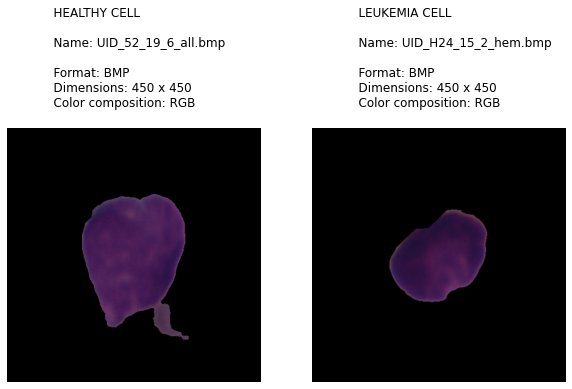

In [ ]:
iv.image_viz(path_H, path_L, title_image)

**Conclusions**

The **task of identifying immature leukemic blasts from normal cells** under the microscope is **challenging** due to **morphological similarity**.

### 2.2 Join Training_Data Folders

Join Training folders, calculating the total number of **Healthy** and **Leukemia cells**.

Let's load the module: **files_management** as **fm**

In [ ]:
# Training Data
train_path = path_input+TRAIN

In [ ]:
data = fm.join_folders(FOLDERS, CELLS, train_path)
all=data[0]
hem=data[1]

In [ ]:
print(f'Training set {CELLS[0].upper()}: {len(all)} images')
print(f'Training set {CELLS[1].upper()}: {len(hem)} images')

Training set ALL: 7272 images
Training set HEM: 3389 images


### 2.3 Images Visualization

In this section, we only choose a total of **first 150 images** to speed up the notebook.

For every **2 images** in folder **ALL** there is aprox **1 image** in folder **HEM**. For this reason, we load 100 images from ALL and 50 from HEM.


#### ALL

In [ ]:
all_100_data=iv.data_labels(all,1,100)

100%|██████████| 100/100 [00:41<00:00,  2.41it/s]


In [ ]:
all_100_tr_images = all_100_data[0]
all_100_tr_labels = all_100_data[1]

### HEM

In [ ]:
hem_50_data=iv.data_labels(hem,0,50)

100%|██████████| 50/50 [00:19<00:00,  2.52it/s]


In [ ]:
hem_50_tr_images = hem_50_data[0]
hem_50_tr_labels = hem_50_data[1]

#### Join Arrays

In [ ]:
# Images
viz_images = np.concatenate((all_100_tr_images, hem_50_tr_images), axis=0)

In [ ]:
# Labels
viz_labels = np.concatenate((all_100_tr_labels, hem_50_tr_labels), axis=0)

In [ ]:
# Save Numpy Arrays
np.save('viz_images.npy', viz_images, allow_pickle=True, fix_imports=True)
np.save('viz_labels.npy', viz_labels, allow_pickle=True, fix_imports=True)

In [ ]:
# Export images
!cp viz_images.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/viz/'
# # Export images
!cp viz_labels.npy '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/viz/'

Let's load the modules: **image_viz** as **iv**

Visualize **three randomly images** with the **original format**.

In [ ]:
# Number of shuffle images
n=5

In [ ]:
# Shuffle
shuffle = iv.shuffle_selector(viz_images,viz_labels,n)

#### Original Image 450x450

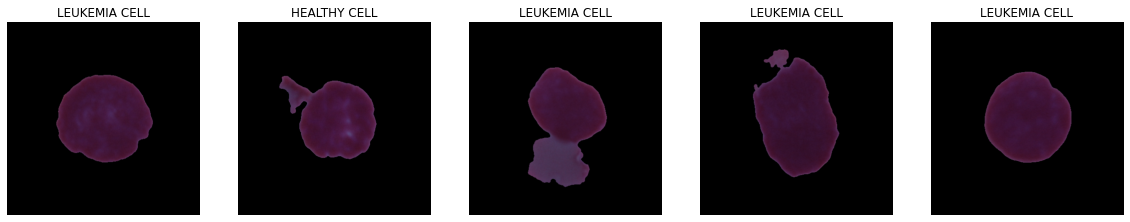

In [ ]:
iv.shuffle_resized_images(shuffle[0], shuffle[1],450,450,n,title_image)

####Comments

We will need to resize the images to train the models. [Please check the Notebook: **2.Image_preprocessing**]


### 2.4 Training Dataframe

#### Create DF

We create a **DataFrame** with all **names** from the **training_data** folder with 2 columns (Patient_ID, labels).


In [ ]:
training_df = eda.dataframe(all,hem,'Patient_ID',64)

In [ ]:
# Leukemia cells
healthy = training_df.head(2)
healthy

,Patient_ID,labels
0,UID_48_28_10_all.bmp,1
1,UID_48_27_9_all.bmp,1


In [ ]:
# Healthy cells
leukemia= training_df.tail(2)
leukemia

,Patient_ID,labels
10659,UID_H13_33_1_hem.bmp,0
10660,UID_H13_33_2_hem.bmp,0


#### Export DF

In [ ]:
# Export dataframe
training_df.to_csv(r'training_patients.csv', index = False)
!cp training_patients.csv '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/csv'

## 3. Data Visualization

We visualize the **distribution** of **diseased cells** with respect to **healthy** ones to see if we have unbalanced data.

Let's load the module: **eda**

In [ ]:
# Variables
label = ['HEM-0','ALL-1']
palette = ['#a29ac3','#522254']
title = '% LEUKEMIA vs HEALTY CELLS'
data = ['Training Set', 'Validation Set']

### 3.1 Training Data

Distribution of the **Training Set** (joined)

In [ ]:
# Summary
eda.summary(training_df)

LEUKEMIA vs HEALTHY CELLS
-------------------------
Numeric
ALL (1): 7272
HEM (0): 3389
-------------------------
Percentage
ALL%(1): 68.2%
HEM%(0): 31.8%


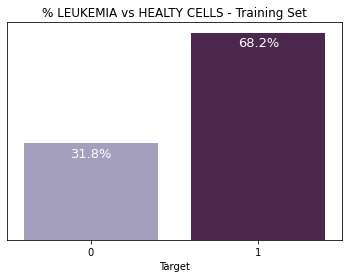

In [ ]:
# Viz
eda.countplot_viz(training_df,'labels',label,palette,title,data[0])

### 3.2 Validation_Data

Quick exploration to see if the **validation set** has the **same distribution** of the **training set**. 

We load the **C-NMC_test_preliminar_phase_data.csv** that contains the labeled data.

#### Load Dataset

In [ ]:
validation_df = pd.read_csv(path_input+VALIDATION+'_labels.csv')
validation_df.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [ ]:
# Summary
eda.summary(validation_df)

LEUKEMIA vs HEALTHY CELLS
-------------------------
Numeric
ALL (1): 1219
HEM (0): 648
-------------------------
Percentage
ALL%(1): 65.3%
HEM%(0): 34.7%


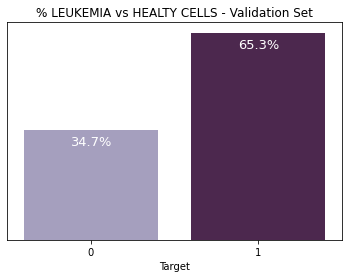

In [ ]:
# Viz
eda.countplot_viz(validation_df,'labels',label,palette,title,data[1])

**Conclusions**

As imagined, the distribution of the training and validation set are similar.

We can see there is a class **imbalance** in the data with almost 2x more positive samples than negative samples.

### 3.3 Testing_Data

Important Note: **Testing_data** folder contains **Unlabeled Images** and is used in Kaggle to confirm the resusts obtained with **Training_data**. We decide **not to use** that **images in this project**.